In [ ]:
#|default_exp hickok_battery
from diffusion_curvature.graphs import *
from diffusion_curvature.datasets import *
from diffusion_curvature.core import *
from diffusion_curvature.compute_diffusion_curvature_of_battery import *
from fastcore.all import *
import numpy as np
from nbdev import show_doc
%load_ext autoreload
%autoreload 2

In [ ]:
name = "core_r05"

In [ ]:
from diffusion_curvature.hickok import scalar_curvature_est 
def hickock_curvature_of_pt(X, dim):
    SC = scalar_curvature_est(
        n = dim, #manifold dim
        X = X, #data
        verbose=False,
    )
    ks_est = SC.estimate(rmax=2, indices=[0])
    return ks_est[0]


In [ ]:
from diffusion_curvature.hickok import scalar_curvature_est
X, ks = torus(3000)
SC = scalar_curvature_est(
    n = 2, #manifold dim
    X = X, #data
    verbose=False,
)
ks_est = SC.estimate(9)
ks_est_idx = SC.estimate(3, indices=[0])

computed Rdist
computed density
computed nearest neighbor matrices


<matplotlib.collections.PathCollection>

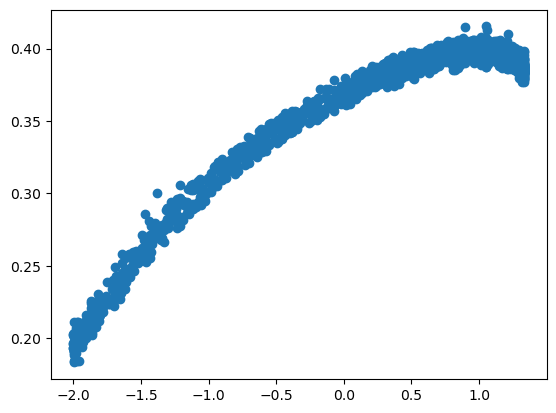

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ks, ks_est)

In [ ]:
# load curvature battery
import deepdish
battery_file = "/home/piriac/data/diffusion_curvature/Curvature_Colosseum_dikey.h5"
CC = deepdish.io.load(battery_file)

In [ ]:
saved_calcs = f"/home/piriac/data/diffusion_curvature/computed_hickok_curvatures_{name}.h5"
if os.path.exists(saved_calcs):
    print(f"Loading saved calculations from {saved_calcs}")
    computed_hickok_curvatures = deepdish.io.load(saved_calcs)
else:
    computed_hickok_curvatures = compute_curvature_on_battery(hickok_curvature_of_pt, CC)
    deepdish.io.save("/home/piriac/data/diffusion_curvature/computed_hickok_curvatures_{name}.h5", computed_hickok_curvatures    )

Loading saved calculations from /home/piriac/data/diffusion_curvature/computed_hickok_curvatures_core_r05.h5


In [ ]:
Xsample = CC[2][3][0.5]['Xs'][8]
hickock_curvature_of_pt(Xsample, 2)

14.954056948843835

In [ ]:
hc_curvature_correlations = compute_correlations(computed_hickok_curvatures, CC)

intrinsic dimensions:   0%|          | 0/4 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
table = result_table(hc_curvature_correlations, c=1)

Codimension =  1
╒═══════╤═══════════════╤════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│   dim │ Noise = 0.0   │ Noise = 0.05   │ Noise = 0.1   │ Noise = 0.2   │ Noise = 0.3   │ Noise = 0.5   │
╞═══════╪═══════════════╪════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│     2 │ 0.885/1.61    │ 0.815/5.90     │ 0.720/3.67    │ 0.553/3.15    │ 0.502/0.00    │ 0.250/0.08    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     3 │ 0.785/1.55    │ 0.689/3.13     │ 0.534/6.60    │ 0.304/0.03    │ 0.218/0.12    │ 0.036/0.80    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     4 │ 0.397/0.00    │ 0.184/0.19     │ 0.331/0.01    │ 0.228/0.11    │ 0.179/0.21    │ -0.035/0.81   │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     5 │ 0.089/0.53

In [ ]:
table = result_table(hc_curvature_correlations, c=2)

Codimension =  2
╒═══════╤═══════════════╤════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│   dim │ Noise = 0.0   │ Noise = 0.05   │ Noise = 0.1   │ Noise = 0.2   │ Noise = 0.3   │ Noise = 0.5   │
╞═══════╪═══════════════╪════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│     2 │ 0.795/5.62    │ 0.782/1.96     │ 0.344/0.01    │ 0.191/0.18    │ 0.072/0.61    │ 0.143/0.32    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     3 │ 0.378/0.00    │ 0.103/0.47     │ 0.058/0.69    │ 0.186/0.19    │ -0.111/0.44   │ 0.302/0.03    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     4 │ 0.138/0.33    │ 0.195/0.17     │ -0.332/0.01   │ 0.110/0.44    │ -0.049/0.73   │ 0.055/0.70    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     5 │ 0.250/0.08

In [ ]:
table = result_table(hc_curvature_correlations, c=3)

Codimension =  3
╒═══════╤═══════════════╤════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│   dim │ Noise = 0.0   │ Noise = 0.05   │ Noise = 0.1   │ Noise = 0.2   │ Noise = 0.3   │ Noise = 0.5   │
╞═══════╪═══════════════╪════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│     2 │ 0.570/1.53    │ 0.350/0.01     │ -0.016/0.91   │ -0.090/0.53   │ -0.018/0.90   │ -0.134/0.35   │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     3 │ 0.197/0.16    │ -0.113/0.43    │ 0.181/0.20    │ -0.090/0.53   │ 0.109/0.45    │ 0.194/0.17    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     4 │ 0.006/0.96    │ 0.151/0.29     │ -0.012/0.93   │ -0.052/0.72   │ -0.024/0.86   │ 0.113/0.43    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     5 │ -0.235/0.1

In [ ]:
table_latex = result_table(hc_curvature_correlations, c=1, style='latex_raw')
table_latex += result_table(hc_curvature_correlations, c=2, style='latex_raw')
table_latex += result_table(hc_curvature_correlations, c=3, style='latex_raw')

Codimension =  1
\begin{tabular}{rllllll}
\hline
   dim & Noise = 0.0   & Noise = 0.05   & Noise = 0.1   & Noise = 0.2   & Noise = 0.3   & Noise = 0.5   \\
\hline
     2 & 0.885/1.61    & 0.815/5.90     & 0.720/3.67    & 0.553/3.15    & 0.502/0.00    & 0.250/0.08    \\
     3 & 0.785/1.55    & 0.689/3.13     & 0.534/6.60    & 0.304/0.03    & 0.218/0.12    & 0.036/0.80    \\
     4 & 0.397/0.00    & 0.184/0.19     & 0.331/0.01    & 0.228/0.11    & 0.179/0.21    & -0.035/0.81   \\
     5 & 0.089/0.53    & -0.073/0.61    & -0.374/0.00   & 0.098/0.49    & 0.208/0.14    & 0.197/0.17    \\
\hline
\end{tabular}
Codimension =  2
\begin{tabular}{rllllll}
\hline
   dim & Noise = 0.0   & Noise = 0.05   & Noise = 0.1   & Noise = 0.2   & Noise = 0.3   & Noise = 0.5   \\
\hline
     2 & 0.795/5.62    & 0.782/1.96     & 0.344/0.01    & 0.191/0.18    & 0.072/0.61    & 0.143/0.32    \\
     3 & 0.378/0.00    & 0.103/0.47     & 0.058/0.69    & 0.186/0.19    & -0.111/0.44   & 0.302/0.03    \\
     4 & 0.

In [ ]:
sign_accs = compute_sign_score(computed_hickok_curvatures, CC)

intrinsic dimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
table = result_table(sign_accs, c=2, keys=['accuracy'])

Codimension =  2
╒═══════╤═══════════════╤════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│   dim │   Noise = 0.0 │   Noise = 0.05 │   Noise = 0.1 │   Noise = 0.2 │   Noise = 0.3 │   Noise = 0.5 │
╞═══════╪═══════════════╪════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│     2 │          0.34 │           0.78 │          0.64 │          0.72 │          0.68 │          0.60 │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     3 │          0.22 │           0.26 │          0.16 │          0.24 │          0.22 │          0.34 │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     4 │          0.18 │           0.12 │          0.10 │          0.18 │          0.08 │          0.20 │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     5 │          0